# Klasifikasi



## Membaca Data

In [133]:
import pandas as pd

df = pd.read_csv("data.csv")
df


,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


## Features dan Target

In [144]:

features = df[df.columns[0:-3]]
target = df[df.columns[-3]]
target


0       1
1       1
2       1
3       1
4       1
       ..
2012    0
2013    0
2014    0
2015    0
2016    0
Name: target, Length: 2017, dtype: int64

## Membagi Data ke dalam data latih

In [145]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)


## Membuat Classifire (KNN)

In [146]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

## Menghitung Akurasi

In [147]:
knn.score(x_test, y_test)

0.8772277227722772

## Tes pada data uji

In [148]:
predict = knn.predict(x_test)

## Confusion Matrix

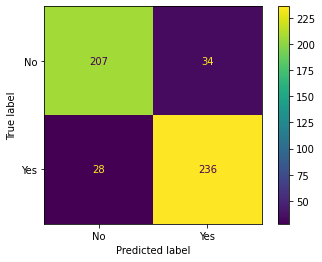

In [137]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predict)
ConfusionMatrixDisplay(cm, display_labels=['No', 'Yes']).plot()

# Klastering

In [99]:
import pandas as pd

df = pd.read_csv("data.csv")

df = df[df.columns[2:5]]
df

,danceability,duration_ms,energy
0,0.833,204600,0.434
1,0.743,326933,0.359
2,0.838,185707,0.412
3,0.494,199413,0.338
4,0.678,392893,0.561
...,...,...,...
2012,0.584,274404,0.932
2013,0.894,182182,0.892
2014,0.637,207200,0.935
2015,0.557,185600,0.992


## K-Means

In [116]:
from sklearn.cluster import  KMeans

kmeans = KMeans(n_clusters=2)
kmeans_labels = kmeans.fit_predict(df)

#tambah kolom
df['Klaster'] = kmeans_labels
df

,danceability,duration_ms,energy,Klaster
0,0.833,204600,0.434,0
1,0.743,326933,0.359,1
2,0.838,185707,0.412,0
3,0.494,199413,0.338,0
4,0.678,392893,0.561,1
...,...,...,...,...
2012,0.584,274404,0.932,0
2013,0.894,182182,0.892,0
2014,0.637,207200,0.935,0
2015,0.557,185600,0.992,0


## Visualisasi

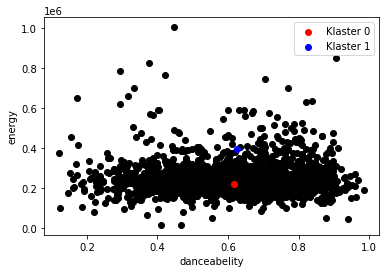

In [128]:
from  matplotlib import pyplot as plt

plt.scatter(df.iloc[:,0], df.iloc[:,1], c="black")
plt.scatter(kmeans.cluster_centers_[0, 0], kmeans.cluster_centers_[0,1], c = "red", label='Klaster 0')
plt.scatter(kmeans.cluster_centers_[1, 0], kmeans.cluster_centers_[1,1], c = "blue", label='Klaster 1')
plt.xlabel('danceabelity')
plt.ylabel('energy')
plt.legend()
plt.show()

## Keanggotaan

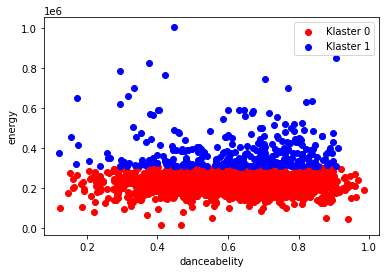

In [131]:
dfc0 = df[df['Klaster']==0]
plt.scatter(dfc0.iloc[:,0], dfc0.iloc[:,1], c="red", label='Klaster 0')
dfc1 = df[df['Klaster']==1]
plt.scatter(dfc1.iloc[:,0], dfc1.iloc[:,1], c="blue", label='Klaster 1')
plt.xlabel('danceabelity')
plt.ylabel('energy')
plt.legend()
plt.show()


## Performa Klastering

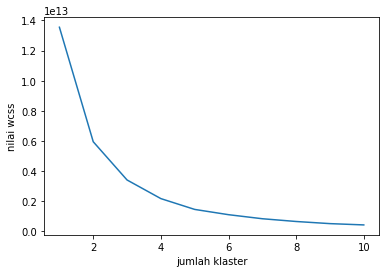

In [132]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
  
plt.plot(range(1,11),wcss)
plt.xlabel('jumlah klaster')
plt.ylabel('nilai wcss')
plt.show()